<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Danielburkeinspired_FuelEfficiencyPredictor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#code from tensorflow colab page
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use("ggplot")

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=col_names, na_values='?', 
            comment='\t', sep=' ', skipinitialspace=True)
print(df.shape)
df.tail(2)

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
#null values, check if 
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
df.loc[df['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


the median Horsepower is [93.5]
the mean Horsepower is [104.46938776]


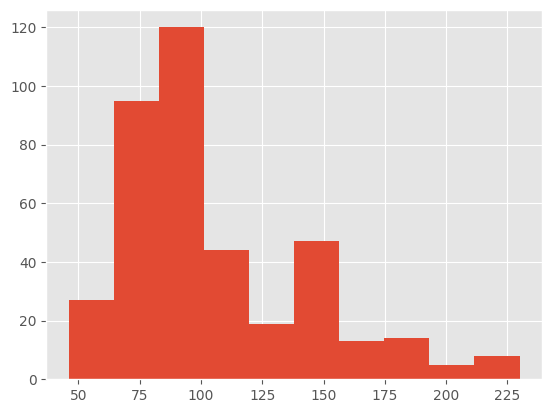

In [5]:
plt.hist(df['Horsepower'])
print("the median Horsepower is",pd.DataFrame(df['Horsepower'].describe()).loc['50%'].values)
print("the mean Horsepower is",pd.DataFrame(df['Horsepower'].describe()).loc['mean'].values)
plt.show()

In [6]:
#fill the missing values with median value
df['Horsepower'].fillna(df['Horsepower'].median(), inplace=True)
#chek for missing values
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
#next step to check the data columns
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
#Origin is where the vehicle originates from 1 USA, 2 EU and 3 Japan, we can map these on to the fields and then one hot encode or just use the numerical category
df['Origin'].unique()

array([1, 3, 2])

In [9]:
df.drop(['Cylinders', 'Origin'], axis=1).head(1)

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,307.0,130.0,3504.0,12.0,70


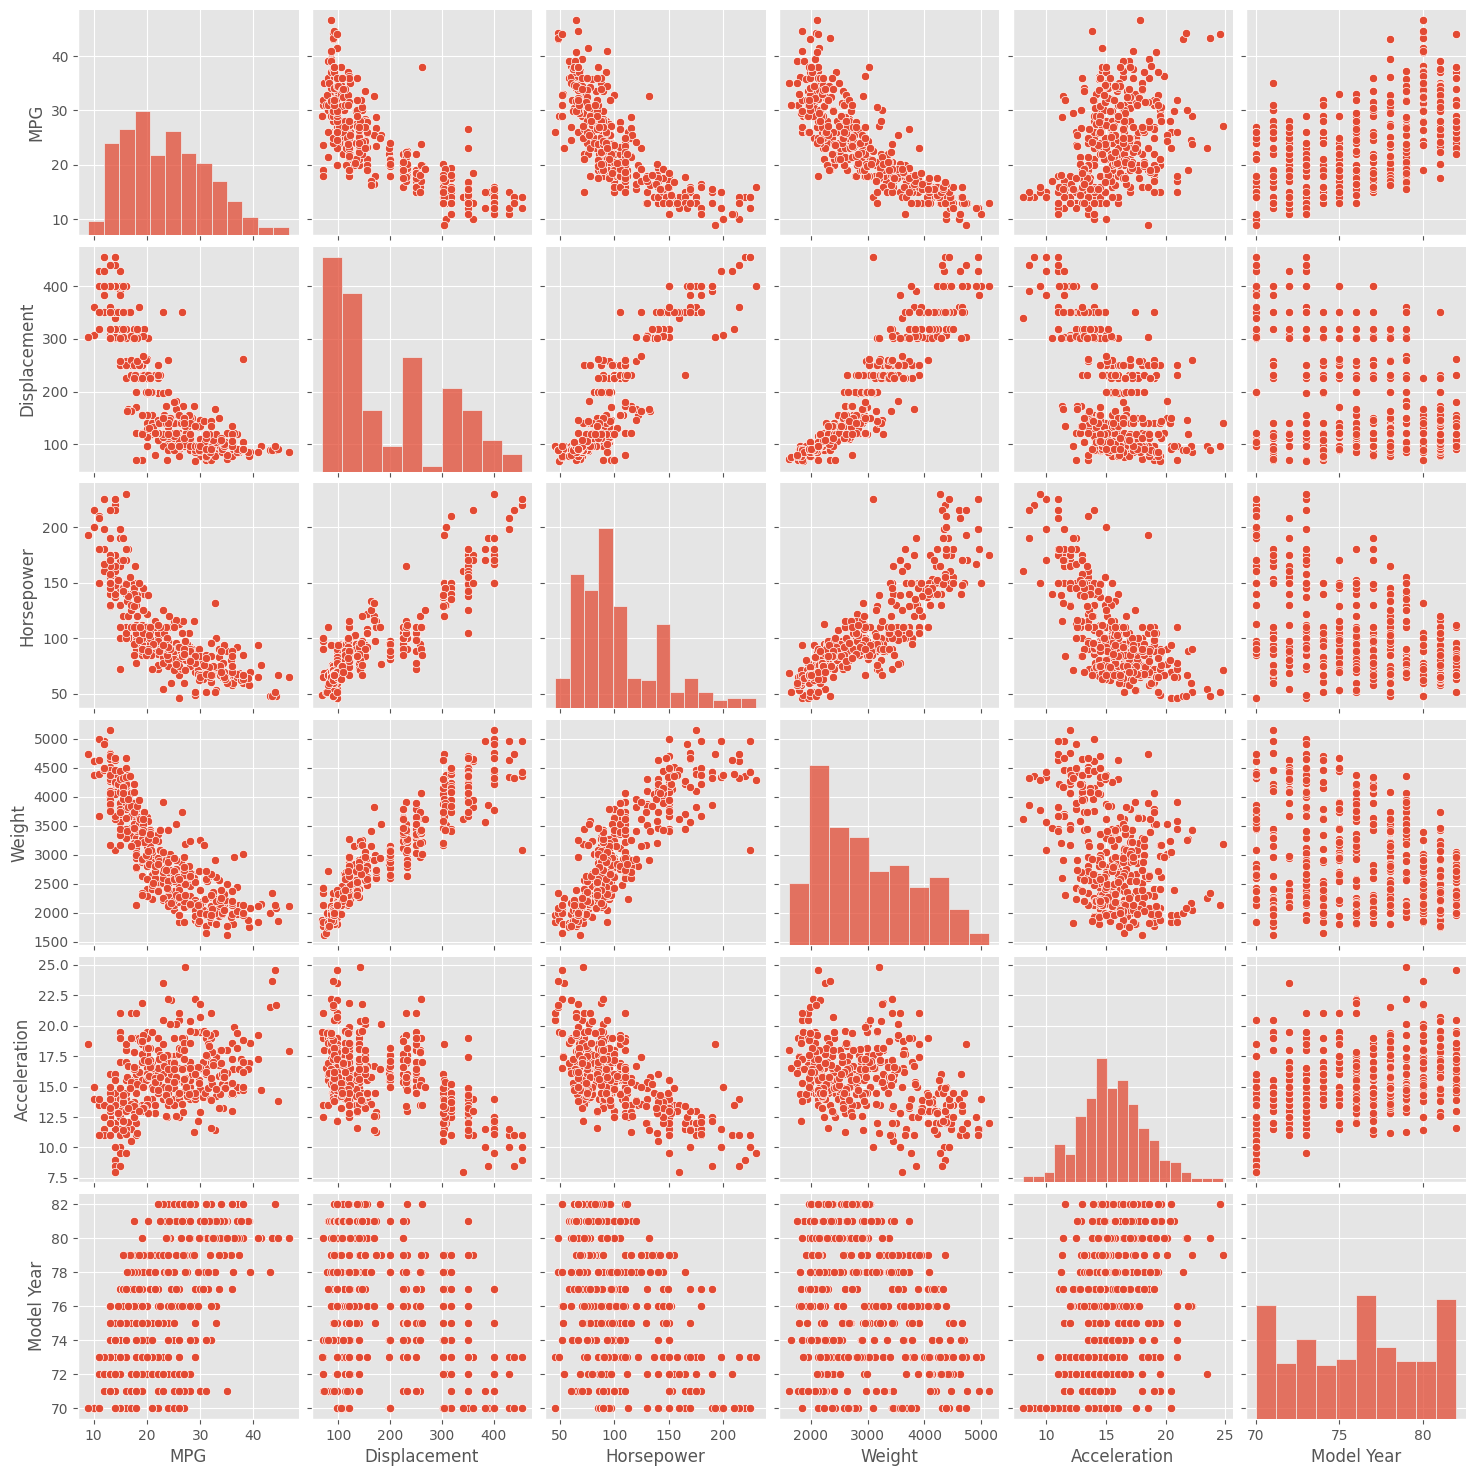

In [10]:
#first lets look at the relationship using seaborn pairplot
sns.pairplot(df.drop(['Cylinders', 'Origin'], axis=1))

<Axes: >

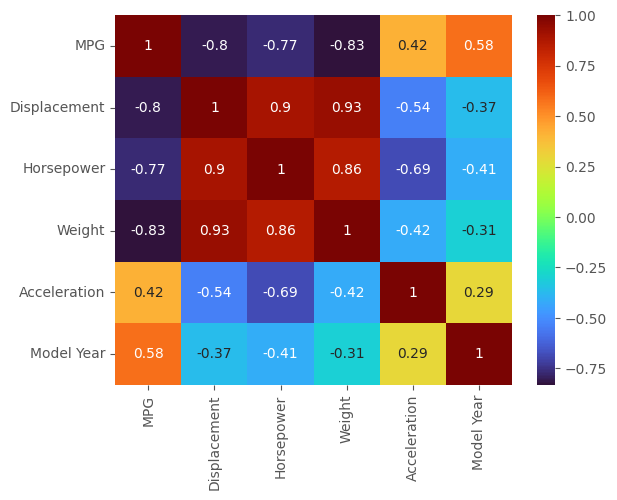

In [11]:
#also use corr
sns.heatmap(df.drop(['Cylinders', 'Origin'], axis=1).corr(), cmap='turbo', annot=True)

# Simple (Single feature Linear Regression)
* use weight to predict MPG 

In [12]:
#Lets predict MPG using one feature, lets start weight of the car, we using a numpy array as tensorflow accepts it
X= np.array(df['Weight'])
y = np.array(df['MPG'])

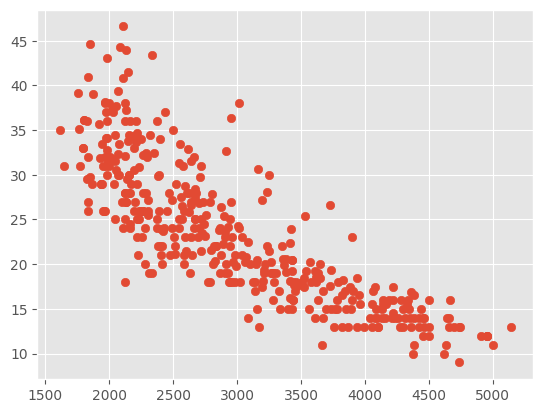

In [13]:
#plot a scatter plot
plt.scatter(x=X, y=y)
plt.show()

In [14]:
#we will use sklearn along with tensorflow
from sklearn.model_selection import train_test_split

#normalize the input feature
def minMaxScaler(m):
  return (m-min(m))/(max(m)-min(m))

In [15]:
 X_scaled= minMaxScaler(X)
 X_scaled[:10]

array([0.5361497 , 0.58973632, 0.51686986, 0.51601928, 0.52055571,
       0.77346187, 0.77714772, 0.76523958, 0.79727814, 0.63425007])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298,), (100,), (298,), (100,))

In [17]:
#lets build our model, it has one input and one output, lets build it with in 1 out layer and 1 output, then 5 inout and 1 output layrer
# 1 on 1 instantiate the model
model = tf.keras.Sequential()
#build the model
model.add(
    tf.keras.layers.Dense(1, tf.keras.activations.relu, input_dim=1)
)
#compile the model
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=tf.keras.metrics.mae
              )
#fit the model and run it
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.get_weights()

[array([[-0.73500776]], dtype=float32), array([0.], dtype=float32)]

In [20]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

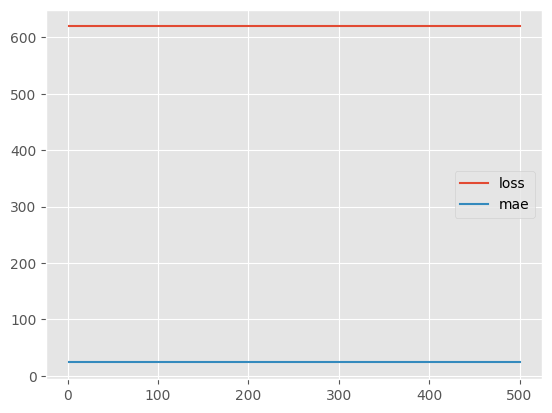

In [21]:
sns.lineplot(
    x = np.arange(1, len(history.history['loss'])+1,1),
    y = history.history['loss'], label = 'loss'
)
sns.lineplot(
    x = np.arange(1, len(history.history['mean_absolute_error'])+1,1),
    y = history.history['mean_absolute_error'], label='mae'
)
plt.show()

In [22]:
#predict
y_pred = model.predict(X_test)
y_pred[:3]

4/4 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)

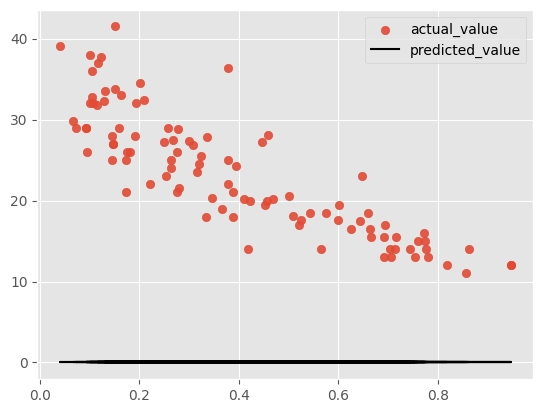

In [23]:
plt.scatter(
            x=X_test,
            y=y_test,
            label='actual_value', alpha=0.9
          ) 
plt.plot(
    X_test,
    y_pred,
    label='predicted_value', color='k'
)
plt.legend()
plt.show()

# Modelling without Normalization: we will compare the result

In [24]:
#lets do linear regression without normalization and compare
X = np.array(df['Weight'])
y = np.array(df['MPG'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
#instatiate the model
model = tf.keras.Sequential()

#buid the network
#and remove activation function
model.add(tf.keras.layers.Dense(1, input_dim=1))

#compile the model: optimize and check error
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.mse,
              metrics=tf.keras.metrics.mse)

#fit model and save it in history 
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [26]:
#predict
y_pred = model.predict(X_test, verbose=0)
print(y_pred[:3])
history.history.keys()

[[16.045267]
 [14.640331]
 [11.756214]]


dict_keys(['loss', 'mean_squared_error'])

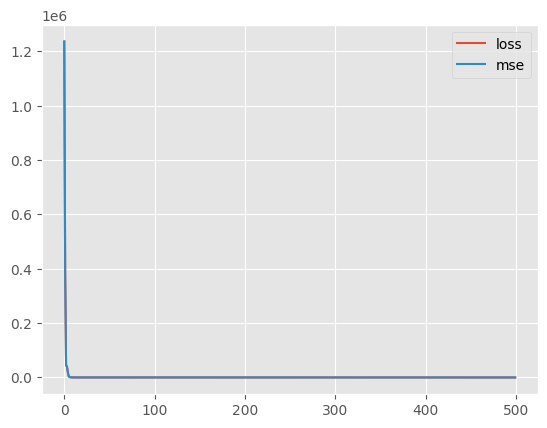

In [27]:
sns.lineplot(
    x = history.epoch,
    y = history.history['loss'], label = 'loss'
)
sns.lineplot(
    x = history.epoch,
    y = history.history['mean_squared_error'], label='mse'
)
plt.show()

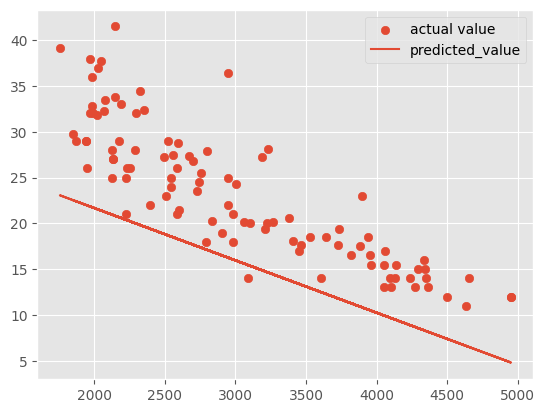

In [28]:
plt.scatter(x=X_test, y=y_test, label='actual value')
plt.plot(X_test, y_pred, label='predicted_value')
plt.legend()
plt.show()

# normalizing and No activation function

In [29]:
#lets do linear regression without normalization and compare
X = np.array(df['Weight'])
y = np.array(df['MPG'])

#max and min values will be used for reversing the scaled weights
max_weight, min_weight = X.max(), X.min()
X_scaled = minMaxScaler(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [30]:
#instantiate the keras model
model = tf.keras.Sequential()

#build the model add layers
model.add(tf.keras.layers.Dense(1, input_dim=1))

#compile the model: error/loss then optimse and them get the error
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=tf.keras.metrics.mse
              )

#fit the model and save history
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [31]:
#check your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_pred = model.predict(X_test, verbose=0)
print(history.history.keys())
y_pred[:2]

dict_keys(['loss', 'mean_squared_error'])


array([[23.40445],
       [21.47988]], dtype=float32)

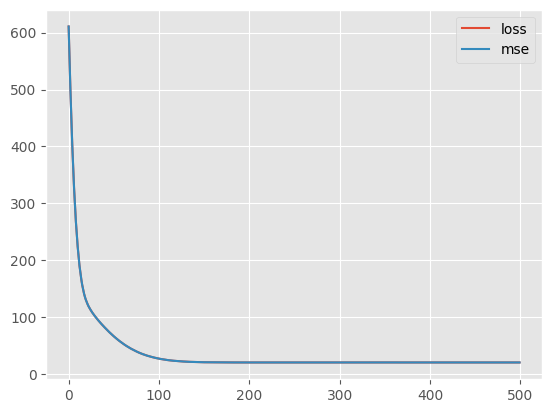

In [33]:
#lets plot the result
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['mean_squared_error'], label='mse')
plt.legend()
plt.show()

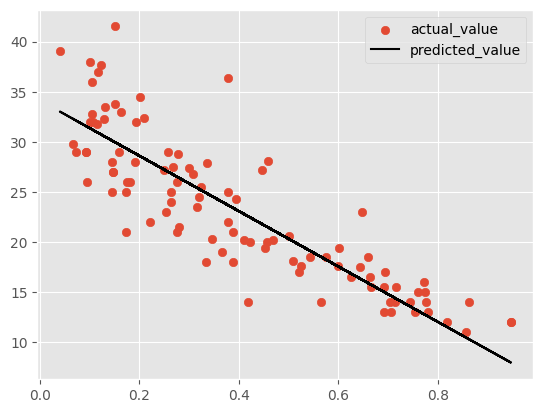

In [34]:
#lets do a scatter plot
plt.scatter(x=X_test, y=y_test, label='actual_value')
plt.plot(X_test, y_pred, label='predicted_value', color='k')
plt.legend()
plt.show()

In [35]:
# to reverse the minmax scaler we can use the formula normalized_weight*(Max-Min) + Min
X_test_reversed = X_test*(max_weight-min_weight) + min_weight

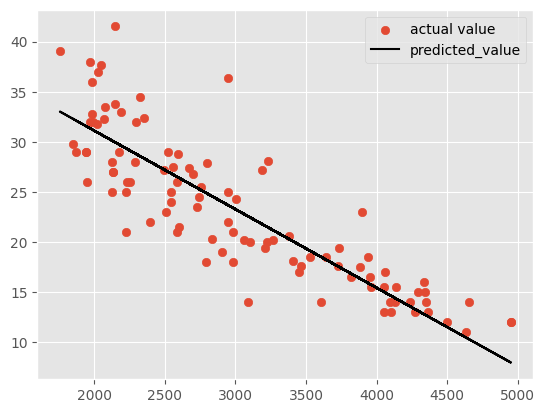

In [36]:
plt.scatter(x=X_test_reversed, y=y_test, label='actual value')
plt.plot(X_test_reversed, y_pred, label='predicted_value', color='k')
plt.legend()
plt.show()

In [37]:
#using the above for single values
def singleMinMaxScaler(x):
  return (x - min_weight)/(max_weight-min_weight)

singleMinMaxScaler(3357)

0.4944712220017012

In [38]:
#predict a single value, to do that we need to scale it to min max using a single value, then reshape to a 1 dimensional array

def singleValuePredictor(y):
  return model.predict(singleMinMaxScaler(y).reshape(1), verbose=0)

for i in [2900,3028, 4020, 4090]:
  print(singleValuePredictor(i))

[[24.06162]]
[[23.060219]]
[[15.299349]]
[[14.751707]]


# Linear regression Based on multiple input features

In [39]:
# we wil drop the least correlated input feature : Acceleration and use the rest as input features
""" 
Before i applied fillna and populate the nans in the dataframe with values my model returned nan values when I fit the model. Apparently, the nan values
have propagated through the network and returned nan values
"""
X = df.drop(['MPG', 'Acceleration'], axis=1)
y = np.array(df['MPG'])
print(f"Null values in the column: {X.isnull().sum()[X.isnull().sum()>0]}")
X['Horsepower'].fillna(X['Horsepower'].median(), inplace=True)
print(f"After fillna there is no Null values in dataframe: {X.isnull().sum()[X.isnull().sum()>0]}")

Null values in the column: Series([], dtype: int64)
After fillna there is no Null values in dataframe: Series([], dtype: int64)


In [40]:
#Scale the input features and convert it to numpy array for tensorflow to work efficiently
X_scaled = np.array(X.apply(minMaxScaler, axis=0))

#split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

#instantiate the NN model
model = tf.keras.Sequential()

#build the network: 1 layer with 10 neurons and no activation function since this is a linear regression problem, and 1 output for predicting the MPG
model.add(tf.keras.layers.Dense(10, input_dim=6))
model.add(tf.keras.layers.Dense(1))

#compile the network, hence calulate error, optimise and get metrics
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=tf.keras.metrics.mae)

#fit the model and keep history of the fit
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [41]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 8.2975 - mean_absolute_error: 2.2137


[8.297476768493652, 2.213686943054199]

In [42]:
print(f"The number of inputs to 10 neurons is 6*10 plus 10 biases, \
10 neurons to 1 output neuron is 10*1 plus 1 bias. in total = {60+10+10+1} parameters")
model.summary()

The number of inputs to 10 neurons is 6*10 plus 10 biases, 10 neurons to 1 output neuron is 10*1 plus 1 bias. in total = 81 parameters
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [43]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

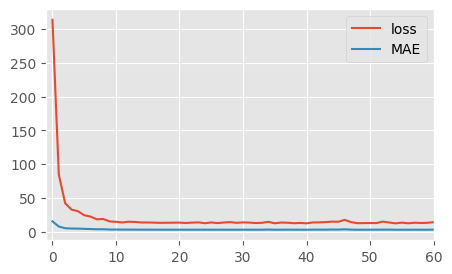

In [44]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['mean_absolute_error'], label='MAE')
plt.xlim(-1, 60)
plt.legend()
plt.show()

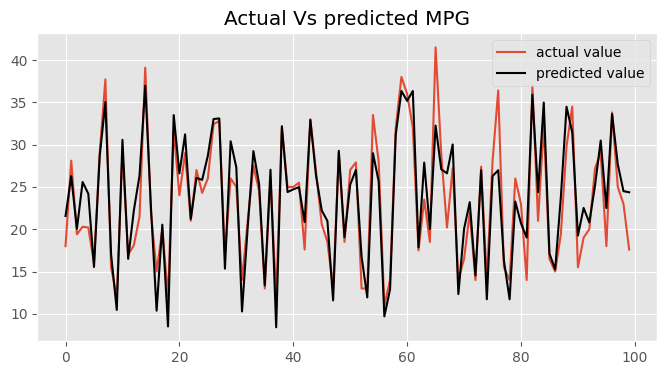

In [45]:
#get the prediction
y_pred=model.predict(X_test, verbose=0)
plt.figure(figsize=(8,4))
plt.plot(y_test, label='actual value')
plt.plot(y_pred, label='predicted value', color='k')
plt.title("Actual Vs predicted MPG")
plt.legend()
plt.show()